   Trade         Type Signal       Date/Time  Price USD  Contracts  \
0    212   Exit Short   Long  6/12/2024 9:30      36.10         28   
1    212  Entry Short  Short  6/11/2024 9:30      34.74         28   
2    211    Exit Long  Short  6/11/2024 9:30      34.74         29   
3    211   Entry Long   Long   6/3/2024 9:30      33.88         29   
4    210   Exit Short   Long   6/3/2024 9:30      33.88         30   

   Profit USD  Profit %  Cum. Profit USD  Cum. Profit %  Run-up USD  Run-up %  \
0      -40.06     -4.11          2597.18          -0.32       14.43      1.48   
1      -40.06     -4.11          2597.18          -0.32       14.43      1.48   
2       22.95      2.33          2637.25           0.18       63.40      6.45   
3       22.95      2.33          2637.25           0.18       63.40      6.45   
4      -32.90     -3.34          2614.30          -0.26        6.51      0.66   

   Drawdown USD  Drawdown %  
0         39.05        4.01  
1         39.05        4.01  
2 

{'Total Return': 5194.44,
 'Average Return': 12.251037735849057,
 'Max Drawdown': 0.0,
 'Sharpe Ratio': 2.7477059235364463,
 'Sortino Ratio': 0.021054666722279243,
 'Sharpe Ratio Grade': 'Good'}

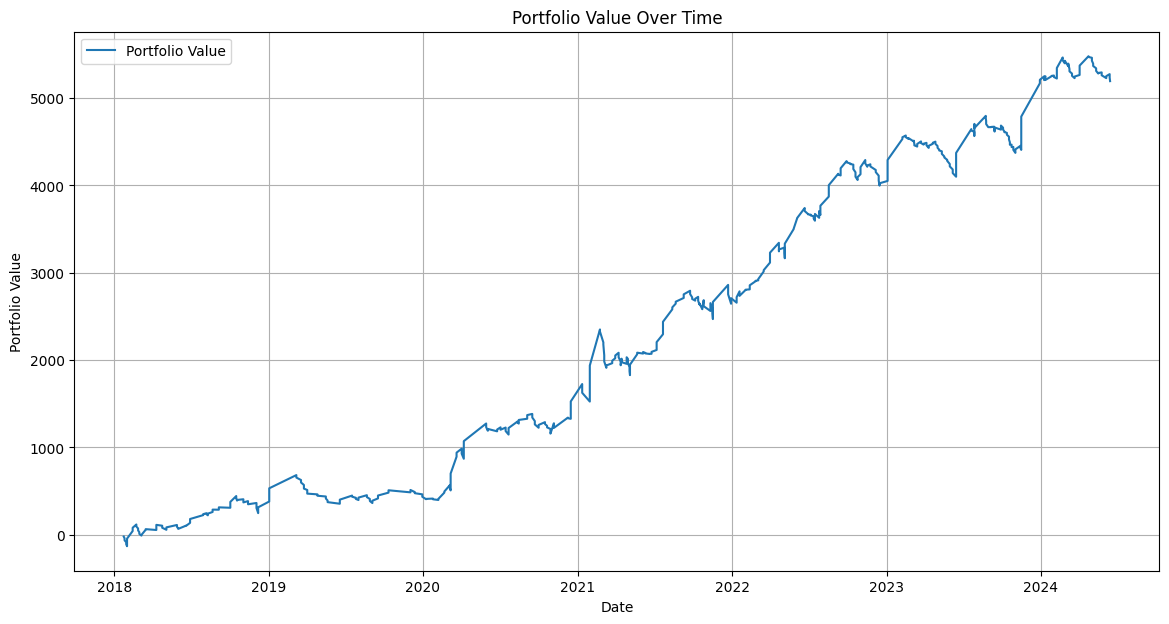

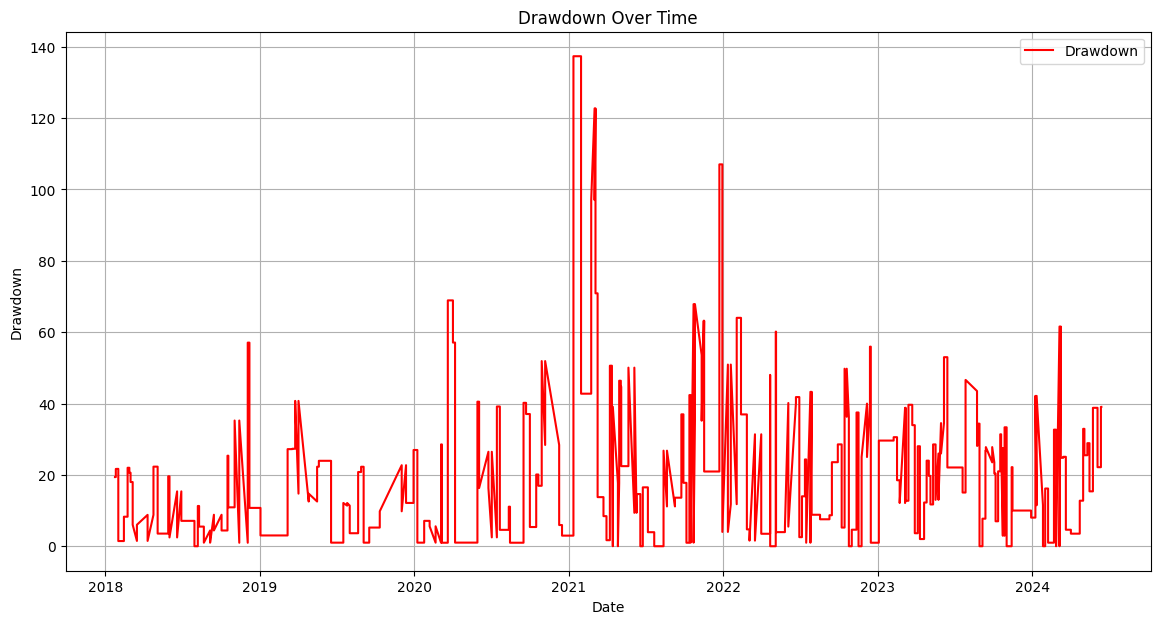

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

# Define file path
file_path = '/Users/jakemanning/Repos/pythonProject-openCV/templates/reports/Stop_Breakout_List_of_Trades_2024-06-16.csv'

# Function to read the data
def read_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Read the data
df = read_data(file_path)

# Display the first few rows to understand the structure
print(df.head())
print(df.columns)

# Based on the inspection, set the correct column names
datetime_column = 'Date/Time'
profit_column = 'Profit USD'
drawdown_column = 'Drawdown USD'

# Verify the actual column names
print(f"Using columns - Date/Time: {datetime_column}, Profit: {profit_column}, Drawdown: {drawdown_column}")

# Convert Date/Time column to datetime
df[datetime_column] = pd.to_datetime(df[datetime_column])

# Calculate daily returns assuming the data is sorted by datetime
df = df.sort_values(by=datetime_column)
df['Daily Return'] = df[profit_column]

# Function to calculate performance metrics
def calculate_performance_metrics(df):
    metrics = {}
    metrics['Total Return'] = df[profit_column].sum()
    metrics['Average Return'] = df[profit_column].mean()
    metrics['Max Drawdown'] = df[drawdown_column].min()
    metrics['Sharpe Ratio'] = df['Daily Return'].mean() / df['Daily Return'].std() * np.sqrt(252)  # Assuming daily returns
    
    # Sortino Ratio
    target_return = 0
    negative_returns = df['Daily Return'][df['Daily Return'] < target_return]
    downside_deviation = np.sqrt((negative_returns**2).mean()) * np.sqrt(252)
    metrics['Sortino Ratio'] = (df['Daily Return'].mean() - target_return) / downside_deviation

    # Sharpe Ratio Grade
    if metrics['Sharpe Ratio'] < 1:
        metrics['Sharpe Ratio Grade'] = 'Poor'
    elif 1 <= metrics['Sharpe Ratio'] < 2:
        metrics['Sharpe Ratio Grade'] = 'Average'
    elif 2 <= metrics['Sharpe Ratio'] < 3:
        metrics['Sharpe Ratio Grade'] = 'Good'
    else:
        metrics['Sharpe Ratio Grade'] = 'Excellent'
    
    return metrics

# Function to plot performance data
def plot_performance(df):
    # Calculate cumulative portfolio value
    df['Portfolio Value'] = df[profit_column].cumsum()

    plt.figure(figsize=(14, 7))
    plt.plot(df[datetime_column], df['Portfolio Value'], label='Portfolio Value')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.title('Portfolio Value Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(14, 7))
    plt.plot(df[datetime_column], df[drawdown_column], label='Drawdown', color='red')
    plt.xlabel('Date')
    plt.ylabel('Drawdown')
    plt.title('Drawdown Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to display performance metrics and plots
def display_performance_report(df):
    metrics = calculate_performance_metrics(df)
    display(metrics)
    plot_performance(df)

# Display performance report
display_performance_report(df)


In [5]:
import pandas as pd

# Read the CSV file
file_path = '/Users/jakemanning/Repos/pythonProject-openCV/templates/reports/Stop_Breakout_List_of_Trades_2024-06-16.csv'
df = pd.read_csv(file_path)

# Display the first few rows and the columns to understand the structure
print(df.head())
print(df.columns)


   Trade         Type Signal       Date/Time  Price USD  Contracts  \
0    212   Exit Short   Long  6/12/2024 9:30      36.10         28   
1    212  Entry Short  Short  6/11/2024 9:30      34.74         28   
2    211    Exit Long  Short  6/11/2024 9:30      34.74         29   
3    211   Entry Long   Long   6/3/2024 9:30      33.88         29   
4    210   Exit Short   Long   6/3/2024 9:30      33.88         30   

   Profit USD  Profit %  Cum. Profit USD  Cum. Profit %  Run-up USD  Run-up %  \
0      -40.06     -4.11          2597.18          -0.32       14.43      1.48   
1      -40.06     -4.11          2597.18          -0.32       14.43      1.48   
2       22.95      2.33          2637.25           0.18       63.40      6.45   
3       22.95      2.33          2637.25           0.18       63.40      6.45   
4      -32.90     -3.34          2614.30          -0.26        6.51      0.66   

   Drawdown USD  Drawdown %  
0         39.05        4.01  
1         39.05        4.01  
2 